# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_yearly = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 79 - T-tests & Distributions - Tragic Discovery of Handwashing/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 79 - T-tests & Distributions - Tragic Discovery of Handwashing/monthly_deaths.csv',
                      parse_dates=['date'])

In [6]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [7]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [8]:
print(f'Shapes of: \ndf_yearly: {df_yearly.shape}\ndf_monthly: {df_monthly.shape}')

Shapes of: 
df_yearly: (12, 4)
df_monthly: (98, 3)


In [9]:
print(f'Column names of: \ndf_yearly: {", ".join(df_yearly.columns)}\ndf_monthly: {", ".join(df_monthly.columns)}')

Column names of: 
df_yearly: year, births, deaths, clinic
df_monthly: date, births, deaths


In [10]:
print(f'Are there NaN values or dupes in: \ndf_yearly NaN: {df_yearly.isna().values.any()}, df_yearly dupes: {df_yearly.duplicated().values.any()}')
print(f'df_monthly NaN: {df_monthly.isna().values.any()}, df_monthly dupes: {df_monthly.duplicated().values.any()}')

Are there NaN values or dupes in: 
df_yearly NaN: False, df_yearly dupes: False
df_monthly NaN: False, df_monthly dupes: False


In [11]:
# average amount of births
df_monthly.births.mean()

267.0

In [12]:
# average amount of deaths
df_monthly.deaths.mean()

22.46938775510204

In [13]:
# or for average amount of deaths/birhts
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [14]:
# alternative to checking NaN's
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [15]:
maternal_deaths_rate = (df_yearly.sum().deaths / df_yearly.sum().births)*100
print(f'Maternal death rate in th 1840s in Vienna is: {maternal_deaths_rate:.3}%')

Maternal death rate in th 1840s in Vienna is: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<!-- <img src=https://i.imgur.com/F9DOJxx.png width=700> -->

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

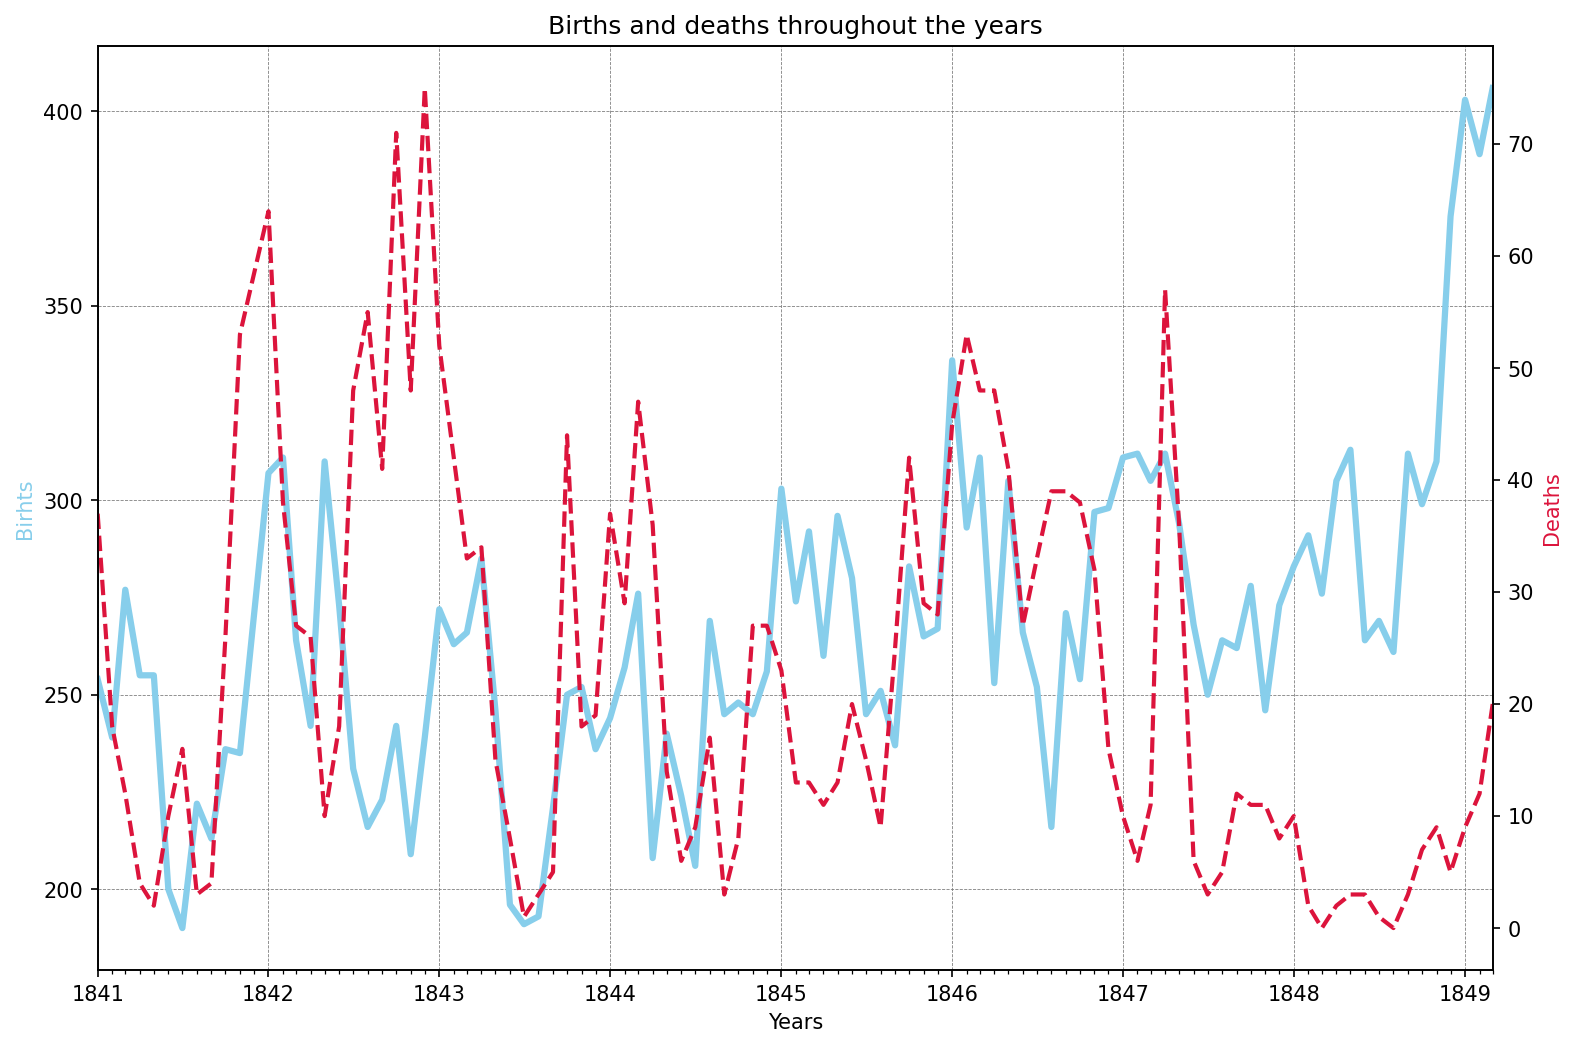

In [16]:
# Try to change the plot size
plt.figure(figsize=(12,8), dpi=150)

# Creating both plots
ax1 = plt.gca()
ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2 = ax1.twinx()
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linestyle='--', linewidth=2)

# Cosmetics
ax1.set_xlabel('Years')
ax1.set_ylabel('Birhts', color='skyblue')
ax2.set_ylabel('Deaths', color='crimson')
ax1.set_title('Births and deaths throughout the years')
ax1.grid(color='gray', linestyle='--', linewidth=0.4)
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # this isn't necessary

# Execute
plt.show()

In late 1840s amount of births started to skyrocket and amount of deaths started to plummet

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [17]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [18]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
print(f'{clinic_1}\n\n\n{clinic_2}')

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
5  1846    4010     459  clinic 1


    year  births  deaths    clinic
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [19]:
# my solutions
clinics = {'Clinic 1': clinic_1, 'Clinic 2': clinic_2}

for clinic in clinics:
  clinic_plot = px.line(
      clinics[clinic],
      x='year',
      y='births'
  )

  clinic_plot.update_layout(
      xaxis={'title': 'Year'},
      yaxis={'title': 'Amount of births'},
      title={'text': f'{clinic} births througout the years'},
  )

  clinic_plot.show()

In [20]:
clinics = {'Clinic 1': clinic_1, 'Clinic 2': clinic_2}

for clinic in clinics:
  clinic_plot = px.line(
      clinics[clinic],
      x='year',
      y='deaths'
  )

  clinic_plot.update_layout(
      xaxis={'title': 'Year'},
      yaxis={'title': 'Amount of deaths'},
      title={'text': f'{clinic} births througout the years'},
  )

  clinic_plot.show()

In [21]:
# Angela solution - which I think is better

births_plot = px.line(
    df_yearly,
    x='year',
    y='births',
    color='clinic'
)

births_plot.update_layout(
      xaxis={'title': 'Year'},
      yaxis={'title': 'Amount of births'},
      title={'text': 'Births througout the years'},
)

births_plot.show()

In [22]:
deaths_plot = px.line(
    df_yearly,
    x='year',
    y='deaths',
    color='clinic'
)

deaths_plot.update_layout(
      xaxis={'title': 'Year'},
      yaxis={'title': 'Amount of deaths'},
      title={'text': 'Deaths througout the years'},
  )
deaths_plot.show()

In [23]:
print(f'Clinic 1 birth count: {clinic_1.births.sum()}\nClinic 2 birth count: {clinic_2.births.sum()}')

Clinic 1 birth count: 20042
Clinic 2 birth count: 17791


In [24]:
print(f'Clinic 1 highest death count: {clinic_1.deaths.max()}\nClinic 2 highest death count: {clinic_2.deaths.max()}')

Clinic 1 highest death count: 518
Clinic 2 highest death count: 202


### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [25]:
try:  # added error handling to run line multiple times
  df_yearly.insert(4, 'pct_deaths', df_yearly.deaths/df_yearly.births*100)
except ValueError:
  pass
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [26]:
print(f'Maternal rate for clinic 1: {clinic_1.sum().deaths/clinic_1.sum().births*100:.3}%')
print(f'Maternal rate for clinic 2: {clinic_2.sum().deaths/clinic_2.sum().births*100:.3}%')

Maternal rate for clinic 1: 9.92%
Maternal rate for clinic 2: 3.88%


In [27]:
deaths_plot = px.line(
    df_yearly,
    x='year',
    y='pct_deaths',
    color='clinic'
)

deaths_plot.update_layout(
      xaxis={'title': 'Year'},
      yaxis={'title': 'Percentage of deaths'},
      title={'text': 'Deaths % througout the years'},
)

deaths_plot.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [28]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [29]:
try:
  df_monthly.insert(3, 'pct_deaths', df_monthly.deaths/df_monthly.births*100)
except ValueError:
  pass
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08


In [30]:
before_handwashing = df_monthly[df_monthly.date < handwashing_start]
after_handwashing = df_monthly[df_monthly.date >= handwashing_start]
after_handwashing.tail()

,date,births,deaths,pct_deaths
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08
97,1849-03-01,406,20,4.93


In [31]:
# what does the :. do?
print(f'{before_handwashing.pct_deaths.mean():.3}%,\n{after_handwashing.pct_deaths.mean():.3}%')

10.5%,
2.11%


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [32]:
try:
  before_handwashing_dateindex = before_handwashing.set_index('date')  # inplace = True also changed after_handwashing df
except KeyError:
  pass
before_handwashing_dateindex.head()

,births,deaths,pct_deaths
date,,,
1841-01-01,254,37,14.57
1841-02-01,239,18,7.53
1841-03-01,277,12,4.33
1841-04-01,255,4,1.57
1841-05-01,255,2,0.78


In [33]:
rolling_df = before_handwashing_dateindex.pct_deaths.rolling(6).mean()
rolling_df

date
1841-01-01     NaN
1841-02-01     NaN
1841-03-01     NaN
1841-04-01     NaN
1841-05-01     NaN
              ... 
1847-01-01   11.13
1847-02-01    8.44
1847-03-01    6.64
1847-04-01    7.19
1847-05-01    7.44
Name: pct_deaths, Length: 76, dtype: float64

In [34]:
rolling_df

date
1841-01-01     NaN
1841-02-01     NaN
1841-03-01     NaN
1841-04-01     NaN
1841-05-01     NaN
              ... 
1847-01-01   11.13
1847-02-01    8.44
1847-03-01    6.64
1847-04-01    7.19
1847-05-01    7.44
Name: pct_deaths, Length: 76, dtype: float64

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<!-- <img src=https://i.imgur.com/X6TQe0R.png width=500> -->

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

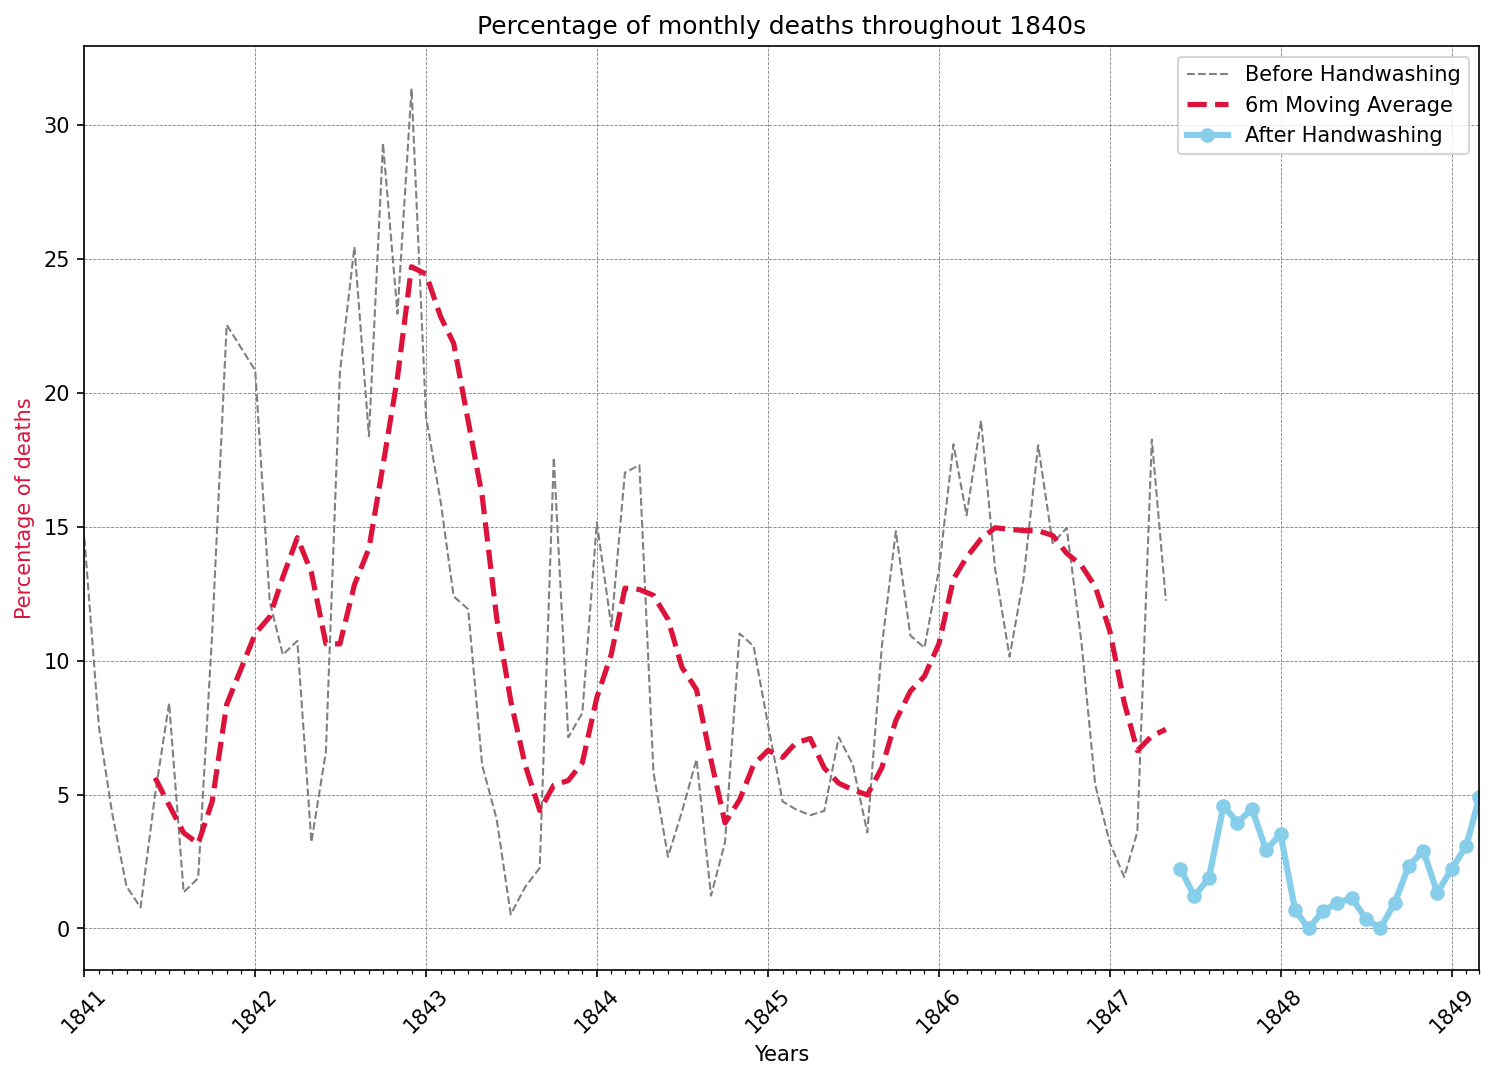

In [35]:
# this is not finished - try testing stuff

# Try to change the plot size
plt.figure(figsize=(12,8), dpi=150)

# Creating plot
ax1 = plt.gca()
ax1.plot(before_handwashing.date, before_handwashing.pct_deaths, color='grey', linestyle='--', linewidth=1, label='Before Handwashing')
ax1.plot(rolling_df.index, rolling_df.values, color='crimson', linestyle='--', linewidth=2.5, label='6m Moving Average')
ax1.plot(after_handwashing.date, after_handwashing.pct_deaths, color='skyblue', marker='o', linewidth=3, label='After Handwashing')

# Cosmetics
ax1.legend(loc="upper right")
ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage of deaths', color='crimson')
ax1.set_title('Percentage of monthly deaths throughout 1840s')
ax1.grid(color='gray', linestyle='--', linewidth=0.4)
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Execute
plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [36]:
print(f'Average percentage of monthly deaths before handwashing {round(before_handwashing.pct_deaths.mean(), 2)}%.\n'
f'Average percentage of monthly deaths after handwashing {round(after_handwashing.pct_deaths.mean(), 2)}%.\n'
f'Difference is {before_handwashing.pct_deaths.mean()-after_handwashing.pct_deaths.mean():.3}%.\n'
f'The overall maternal death rate is: {maternal_deaths_rate:.3}%.\n'
f'After introducind handwashing the maternal mortality rate dropped {(before_handwashing.pct_deaths.mean()/after_handwashing.pct_deaths.mean()):.3} times.')

Average percentage of monthly deaths before handwashing 10.5%.
Average percentage of monthly deaths after handwashing 2.11%.
Difference is 8.4%.
The overall maternal death rate is: 7.08%.
After introducind handwashing the maternal mortality rate dropped 4.98 times.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [37]:
try:
  df_monthly.insert(4, 'handwashing', np.where(df_monthly.date<handwashing_start, 'Before', 'After'))
except ValueError:
  pass
df_monthly

,date,births,deaths,pct_deaths,handwashing
0,1841-01-01,254,37,14.57,Before
1,1841-02-01,239,18,7.53,Before
2,1841-03-01,277,12,4.33,Before
3,1841-04-01,255,4,1.57,Before
4,1841-05-01,255,2,0.78,Before
...,...,...,...,...,...
93,1848-11-01,310,9,2.90,After
94,1848-12-01,373,5,1.34,After
95,1849-01-01,403,9,2.23,After
96,1849-02-01,389,12,3.08,After


In [38]:
df_monthly_box = px.box(
    df_monthly,
    x = 'handwashing',
    y = 'pct_deaths',
)

df_monthly_box.update_layout(
    xaxis={'title': 'Handwashing'},
    yaxis={'title': 'Percentage of deaths'},
    title={'text': 'Handwashing impact on maternal mortality'},
)

df_monthly_box.show()

How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy? - They plummeted drastically

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [39]:
df_monthly_hist = px.histogram(
    df_monthly,
    x='pct_deaths',
    color='handwashing',
    histnorm='percent',
    opacity=0.7,
    barmode='overlay',
    marginal='box',
    nbins=30
)

df_monthly_hist.update_layout(
    xaxis={'title': 'Proportion of monthly deaths'},
    yaxis={'title': 'Count'},
)

df_monthly_hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


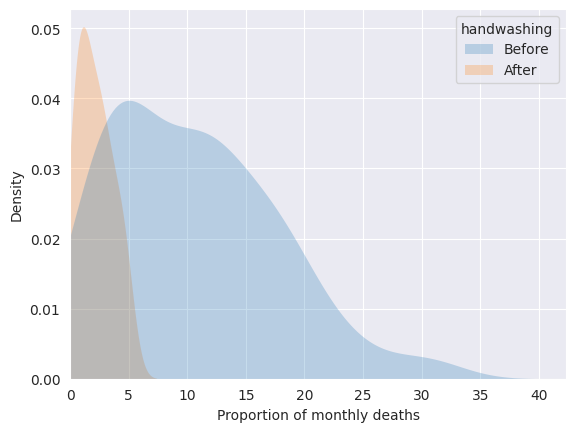

In [62]:
with sns.axes_style('darkgrid'):
  df_monthly_kde = sns.kdeplot(
      df_monthly,
      x='pct_deaths',
      hue='handwashing',
      fill=True,
      linewidth=0,
      clip=(0, 100)
  )

df_monthly_kde.set(
    xlabel='Proportion of monthly deaths',
    ylabel='Density',
    xlim=(0),  # this sets limit of x axis only on the beginning
)

plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [64]:
from scipy import stats

In [ ]:
before_handwashing

In [78]:
ttest = stats.ttest_ind(before_handwashing.pct_deaths, after_handwashing.pct_deaths)
print(f'The t-statistic is: {ttest[0]}\nThe p-value is: {ttest[1]:.3}')

The t-statistic is: 5.511607211341914
The p-value is: 2.99e-07


Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? yes the p-value equals 2.99*10^-7 which is far below


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

# Learning Points & summary
*  How to use histograms to visualise distributions

*  How to superimpose histograms on top of each other even when the data series have different lengths

*  How to use a to smooth out kinks in a histogram and visualise a distribution with a Kernel Density Estimate (KDE)

*  How to improve a KDE by specifying boundaries on the estimates

*  How to use scipy and test for statistical significance by looking at p-values.

*  How to highlight different parts of a time series chart in Matplotib.

*  How to add and configure a Legend in Matplotlib.

*  Use NumPy's `.where()` function to process elements depending on a condition.

# OFFTOP EXERCISES

In [40]:
# creating testing dataframe
df_yearly_test = df_yearly
df_yearly_test

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [41]:
duped_row = pd.DataFrame([df_yearly_test.iloc[0]])  # creating duped row; [] matters here otherwise it shows
nan_row = pd.DataFrame(np.nan, index=[0], columns=['year', 'births', 'deaths', 'clinic'])  # creating empty row

df_yearly_test = pd.concat([df_yearly_test, duped_row, nan_row])  # adding rows with concat (append is deprecated)
df_yearly_test

,year,births,deaths,clinic,pct_deaths
0,"1,841.00","3,036.00",237.00,clinic 1,7.81
1,"1,842.00","3,287.00",518.00,clinic 1,15.76
2,"1,843.00","3,060.00",274.00,clinic 1,8.95
3,"1,844.00","3,157.00",260.00,clinic 1,8.24
4,"1,845.00","3,492.00",241.00,clinic 1,6.90
5,"1,846.00","4,010.00",459.00,clinic 1,11.45
6,"1,841.00","2,442.00",86.00,clinic 2,3.52
7,"1,842.00","2,659.00",202.00,clinic 2,7.60
8,"1,843.00","2,739.00",164.00,clinic 2,5.99
9,"1,844.00","2,956.00",68.00,clinic 2,2.30


In [42]:
# checking for dupes and nan values
print(df_yearly_test.duplicated().values.any())
print(df_yearly_test.isna().values.any())

True
True
